# Train

## What you learn

Preprocessed Datasetを用い、Modelを学習します。

## Why you need

有用性の検証を行うために、学習済みの機械学習モデルが必要です。

## How to do

Business goalの達成に適切な機械学習モデルを選択し、学習します。モデルの選択と学習方法をTechnical Exerciseで示します。

### Technical Exercise

モデルの選択、モデルの学習、学習のチューニングの3段階で進めます。高性能なライブラリやAuto MLの登場により自分でモデルを選択する機会自体が少なくなりつつありますが、`scikit-learn`で提示されているモデル選択のマップは有用です。

![05_train_001.PNG](./images/05_train_001.PNG)

今回は`ElasticNet`/`Lasso`あたりになりそうです。各特長の重要度を取得したいため、今回は`RandomForestRegressor`を用います。

学習するため、前処理済みのデータを読み込みます。

In [1]:
from pathlib import Path
import pandas as pd


train_data_path = Path("../data/processed/train.csv")
train_df = pd.read_csv(train_data_path)

In [2]:
train_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MSZoning,MasVnrType,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,2.436658,-1.489369,-0.729063,-0.068293,-0.517011,0.919349,0.685216,5.734000,-0.050313,-0.288867,...,1.0,1.0,21.0,2.0,1.0,1.0,4.0,8.0,1.0,0.0
1,2.436658,-2.027995,-0.884380,-0.068293,1.279896,0.025322,-0.622371,0.994689,-0.275269,-0.288867,...,4.0,1.0,2.0,2.0,1.0,1.0,4.0,8.0,1.0,0.0
2,-0.871868,0.250808,-0.091664,1.385305,-0.517011,1.084910,0.975791,0.888501,1.425137,-0.288867,...,3.0,1.0,16.0,2.0,1.0,3.0,4.0,8.0,1.0,0.0
3,-0.871868,-0.122087,-0.069919,0.658506,-0.517011,1.018686,0.830504,0.039002,0.763501,-0.288867,...,3.0,1.0,5.0,2.0,1.0,1.0,4.0,8.0,1.0,0.0
4,1.491365,-0.039221,-0.395082,1.385305,-0.517011,0.455780,0.007208,-0.575767,1.557465,-0.288867,...,3.0,2.0,22.0,2.0,1.0,1.0,4.0,8.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,-0.162898,-0.453549,0.597241,-0.795092,1.279896,-0.537584,-1.445667,-0.575767,-0.974398,-0.288867,...,3.0,2.0,7.0,2.0,1.0,1.0,4.0,8.0,1.0,0.0
1162,0.309749,-0.412116,-0.691988,-0.068293,1.279896,-2.027628,0.394641,-0.575767,-0.974398,-0.288867,...,4.0,2.0,17.0,0.0,1.0,1.0,4.0,8.0,1.0,0.0
1163,-0.871868,-0.039221,0.069565,-0.068293,-0.517011,0.455780,0.007208,-0.100718,1.800065,-0.288867,...,3.0,1.0,20.0,2.0,1.0,1.0,4.0,8.0,1.0,0.0
1164,-0.871868,0.623704,0.410360,2.112103,-0.517011,1.151134,1.024220,2.688098,1.804476,-0.288867,...,3.0,1.0,23.0,2.0,1.0,3.0,4.0,8.0,1.0,0.0


モデルの学習を行います。`scikit-learn`では`fit`するだけです。学習結果は、モデルのパラメーター(`RandomForestRegressor`であれば`n_estimators`など)にも大きく依存します。そのため、精度がBusiness goalの達成にクリティカルであればハイパーパラメーターのチューニングを行う必要があります。

In [3]:
from sklearn.ensemble import RandomForestRegressor


X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]
model = RandomForestRegressor(n_estimators=20, max_features='auto')
model.fit(X, y)

RandomForestRegressor(n_estimators=20)

<AxesSubplot:>

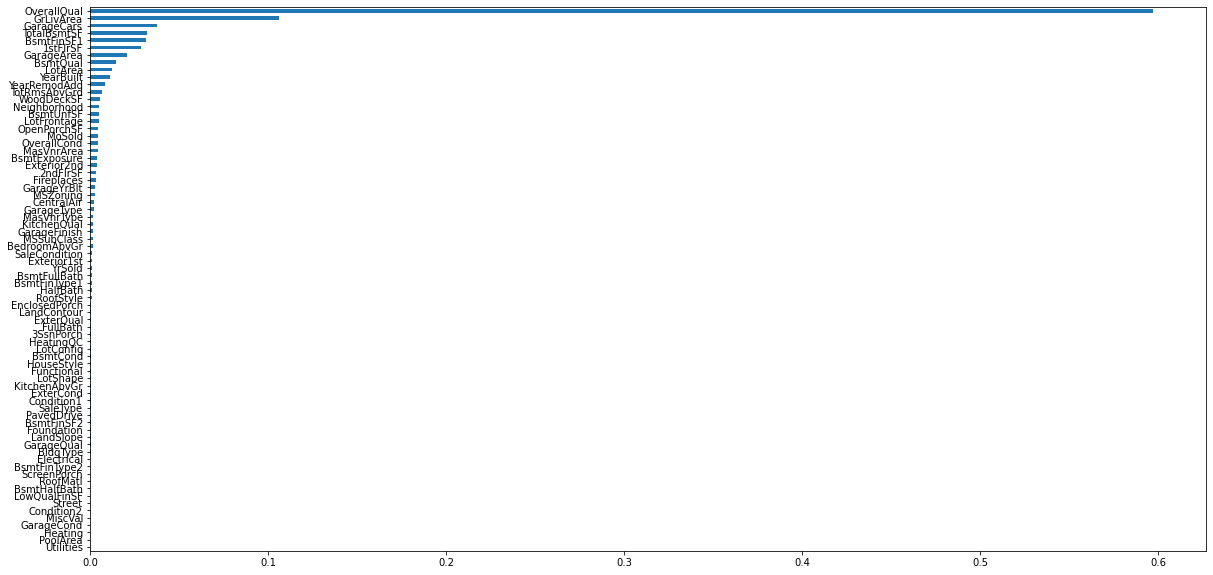

In [4]:
pd.Series(model.feature_importances_, index=X.columns).sort_values().plot.barh(figsize=(20, 10))

Analyzeの結果が示唆するように、OverallQualに重みがかかっていることが読み取れます。分析はTestで行いましょう。モデルを保存します。

In [5]:
from joblib import dump


model_path = Path("../model/model.joblib")
dump(model, model_path) 

['../model/model.joblib']

### Communication Exercise

Data ScientistとしてTrainを行うにあたり、誰にどのような質問をする必要がありますか?

* Product Manager
* Business Analyst
* Data Analyst
* Architect 
* DevOps Engineer
* Software Engineer
* Operator
* System Admin
* IT Auditor
* Data architect
* Domain Expert

#### Example

(この段階では他の人に聞くことはないでしょう。あるいみData Scientistの仕事の中で一番おいしく集中できるところです)。

## Next Step

[Test](06_test.ipynb)

## References

1. Sebastian Raschka, Vahid Mirjalili, 株式会社クイープ and 福島 真太朗. [Python機械学習プログラミング 達人データサイエンティストによる理論と実践 ](https://www.amazon.co.jp/dp/4844380605). 2020.

関連するAWSのサービス

1. SageMaker Training
2. SageMaker Experiments
3. SageMaker Debugger
4. SageMaker AutoPilot
5. SageMaker Canvas
